# XPN 90s A to Z Countdown

It's countdown time at [XPN](https://xpn.org).
While I took a year off from doing stats last year,
as the station did a bang up job and I had other things going on,
I'm up for another crack at it.

This year it's the [90s A-Z](https://xpn.org/program/90s-a-z/) countdown, 
which stated at 8am on December 1st.
There's a [Real Time Countdown](https://xpn.org/countdown/90s-a-z/)
and the usual [Twitter banter](https://twitter.com/search?q=%23XPN90sAtoZ).



In [1]:
%matplotlib inline
from IPython.display import display, HTML

## Status

As I type this it's Friday, Dec 2, things have been running for over a day, and I'm just getting started.

  - Resurrected most of the [Data Loading](Dataloading2.ipynb) with updates for the new playlist format
  - Starting the the absolute basics

## Loading Data

Most people don't care about how I get the data.
If you do, checkout my [Dataloading](Dataloading2.ipynp) notebook.
If you just want to play with the data,
the playlist with some data augmentation, is here as [90sA2Z.csv](data/90sA2Z.csv).
If you do something interesting, let me know,
and post with the `#XPN90sAtoZ` hashtag so people can find it.

In [2]:
import pandas as pd
from datetime import date, datetime, time, timedelta
from os import path
data_dir = './data'
playlist_file = path.join(data_dir, '90sA2Z.csv')
playlist = pd.read_csv(playlist_file)

playlist['Air Time'] = pd.to_datetime(playlist['Air Time'], errors='coerce')
last_play = playlist.loc[playlist['Air Time'].idxmax()]
end_time = last_play['Air Time'] + timedelta(seconds = 60 * last_play['Duration'])
HTML('<p>So far, as of %s, we have seen %d tracks with %d unique titles, from %d artists.</p>' %\
    (end_time.strftime('%b %d %I:%M%p'),
     len(playlist),
     playlist.describe(include='all')['Title']['unique'], 
     playlist.describe(include='all')['Artist']['unique']
     ))

## Analysis

### Most Popular Artist
The first question everyone seems to ask is "which artist has been played the most".



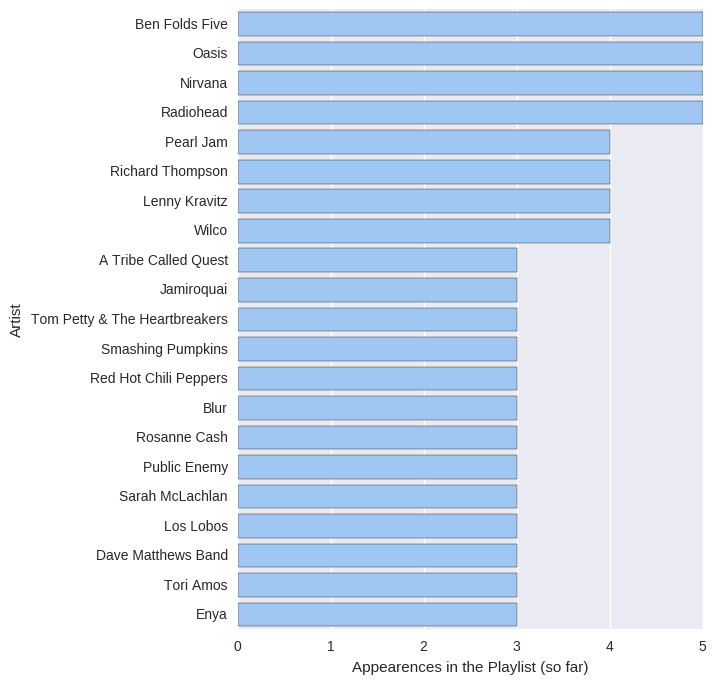

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
c = playlist['Artist'].value_counts()
artists = pd.DataFrame(zip(c.keys().tolist(), c.tolist()),
                       columns=('Artist', 'Count'))
f, ax = plt.subplots(figsize=(6, 8))
sns.set_color_codes('pastel')
sns.barplot(y='Artist', x='Count', data=artists[artists['Count'] > 2], color='b')
ax.set(xlabel="Appearences in the Playlist (so far)")

### Popular Albums

I'd always wanted to group on albums. 
But using an external source like [MusicBrainz](https://musicbrainz.org/) 
to find / guess album names based on artist and title was kind of problematic.
Now that album is in the new playlist format, this is easy.


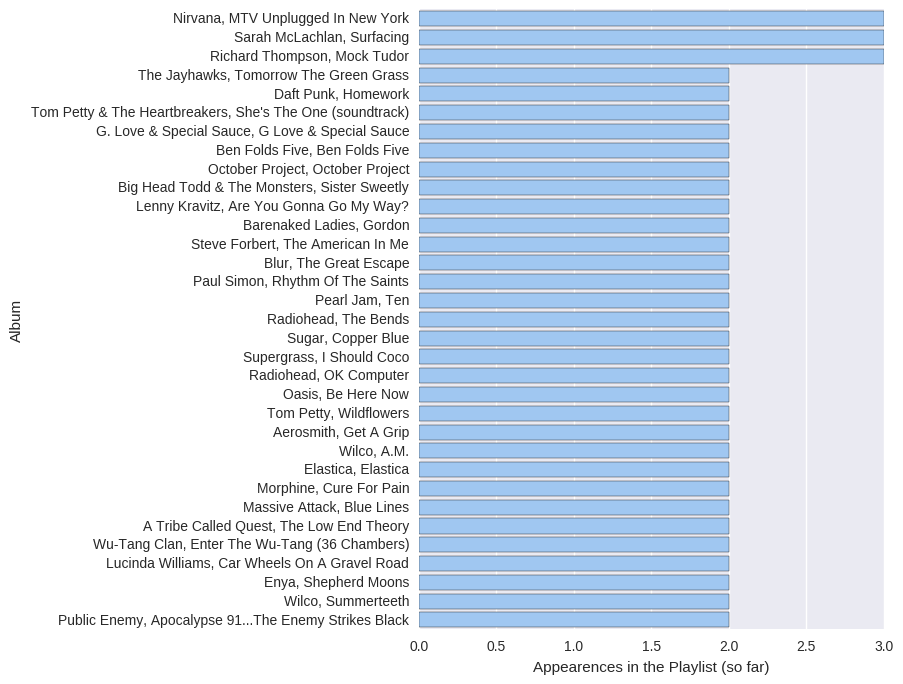

In [4]:
albums = playlist.groupby(['Artist', 'Album']).size().reset_index().rename(columns={0:'Count'})
albums = albums.sort_values(by=['Count'], ascending=False)
albums["label"] = albums['Artist'] + ', ' + albums['Album']
f, ax = plt.subplots(figsize=(6, 8))
sns.set_color_codes('pastel')
sns.barplot(y='label', x='Count', data=albums[albums['Count'] > 1], color='b')
ax.set(xlabel="Appearences in the Playlist (so far)")
ax.set(ylabel="Album")


### Songs By Letter
If we are doing A to Z, it's probably good to know how far we are, 
and have some notion of where we're going.

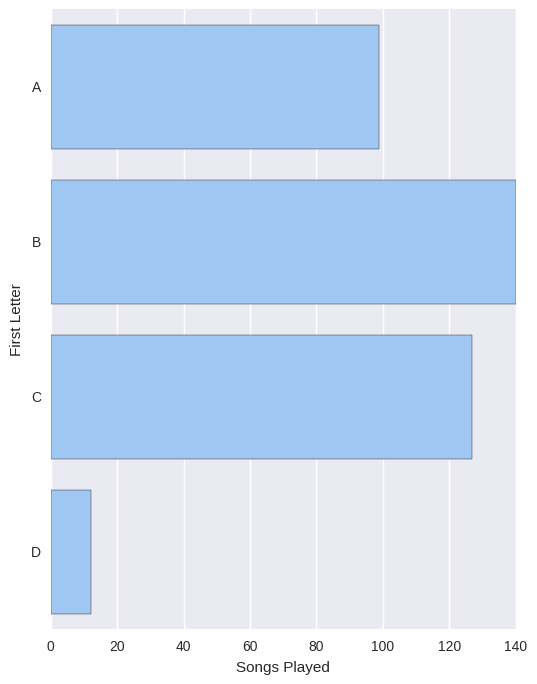

In [5]:
f, ax = plt.subplots(figsize=(6, 8))
sns.set_color_codes('pastel')
sns.countplot(y='Letter', data=playlist, color='b')
ax.set(xlabel="Songs Played", ylabel="First Letter")

### Longest Songs
At some level the duration we calculate is somewhat suspect.
There are station id breaks, and such.
So just counting start to start is iffy.
But it's still interesting.

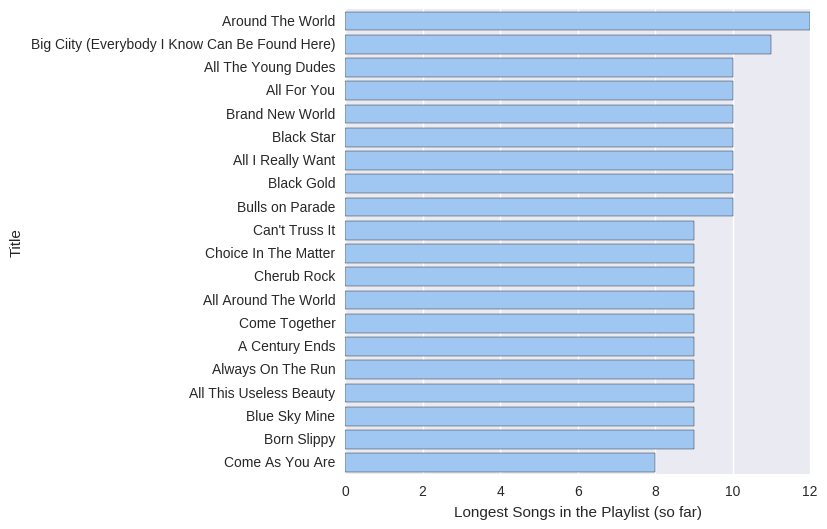

In [6]:
long_songs = playlist.sort_values(by='Duration', ascending=False)
f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes('pastel')
sns.barplot(y='Title', x='Duration', data=long_songs.head(20), color='b')
ax.set(xlabel="Longest Songs in the Playlist (so far)")

### Duplicate Titles
Duplicate titles could be covers. or they could just be "same name, different song".


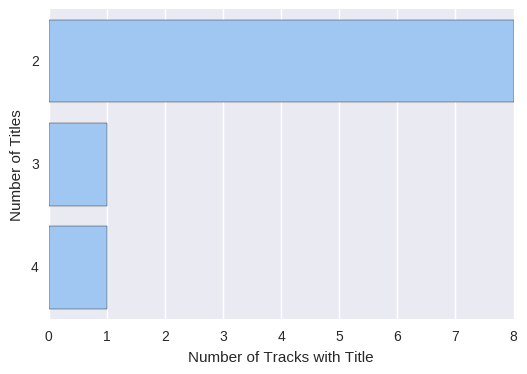

In [7]:
c = playlist['Title'].value_counts()
title_counts = pd.DataFrame(zip(c.keys().tolist(), c.tolist()),
                           columns=('Title', 'Count'))
f, ax = plt.subplots(figsize=(6, 4))
sns.set_color_codes('pastel')
sns.countplot(y='Count', data=title_counts[title_counts['Count'] > 1], color='b')
ax.set(xlabel="Number of Tracks with Title", ylabel="Number of Titles")


In [8]:
HTML(title_counts[title_counts['Count'] > 1].sort_values(by='Title').to_html(index=False))

Title,Count
All Apologies,3
Alright,2
Be Thankful For What You Got,2
Believe,2
Blue,2
Changes,2
Closing Time,2
Congo Square,2
Crazy,2
Creep,4


## Availability
The code for this project is in [my github repo](https://github.com/asudell/a2z)
and this file is specifically [90sA2Z.ipynb](https://github.com/asudell/a2z/blob/master/90sA2Z.ipynb).

## License


This project is licensed under a
[Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).
You are free to use for commercial or non-commercial purposes,
so long as you attribute the source and also allow sharing.